### Preliminary Data Analysis

In [1]:
# Load libraries
library(tidyverse)
library(tidymodels)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### Data Processing
After taking a preliminary look at the data, it does not seem like any row needs to be cleaned. Every datapoint in this dataset seems to be relatively clean. However, taking a closer look, we have noticed that for most columns, there appear to be values that are 0 that do not make sense, such as the blood pressure volume. To combat this, we will filter out these rows for now. If this is not sufficient in the future, we can also consider replacing these rows with NaN values instead, or find another method of cleaning this data. 

Before training our model, we must also remember to center and scale all datapoints for KNN to work properly.

In [61]:
# Load dataset
diabetes <- read_csv("data/diabetes.csv") |> 
            mutate(Outcome = as.factor(Outcome))

diabetes <- filter(diabetes, Glucose != 0) |> 
            filter(BloodPressure != 0) |> 
            filter(SkinThickness != 0) |> 
            filter(Insulin != 0) |> 
            filter(BMI != 0) |> 
            filter(Age != 0) |> 
            filter(DiabetesPedigreeFunction != 0)
            
diabetes

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
3,78,50,32,88,31.0,0.248,26,1
2,197,70,45,543,30.5,0.158,53,1
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
0,118,84,47,230,45.8,0.551,31,1
1,103,30,38,83,43.3,0.183,33,0
1,115,70,30,96,34.6,0.529,32,1


#### Splitting Data
This dataset is relatively small. We will split this dataset as 75% training data and 25% testing data.

In [62]:
# Split data into training and testing sets 
diabetes_split <- initial_split(diabetes, prop = 3/4, strata = Outcome)
diabetes_training <- training(diabetes_split) 
diabetes_testing <- testing(diabetes_split)

#### Visualization


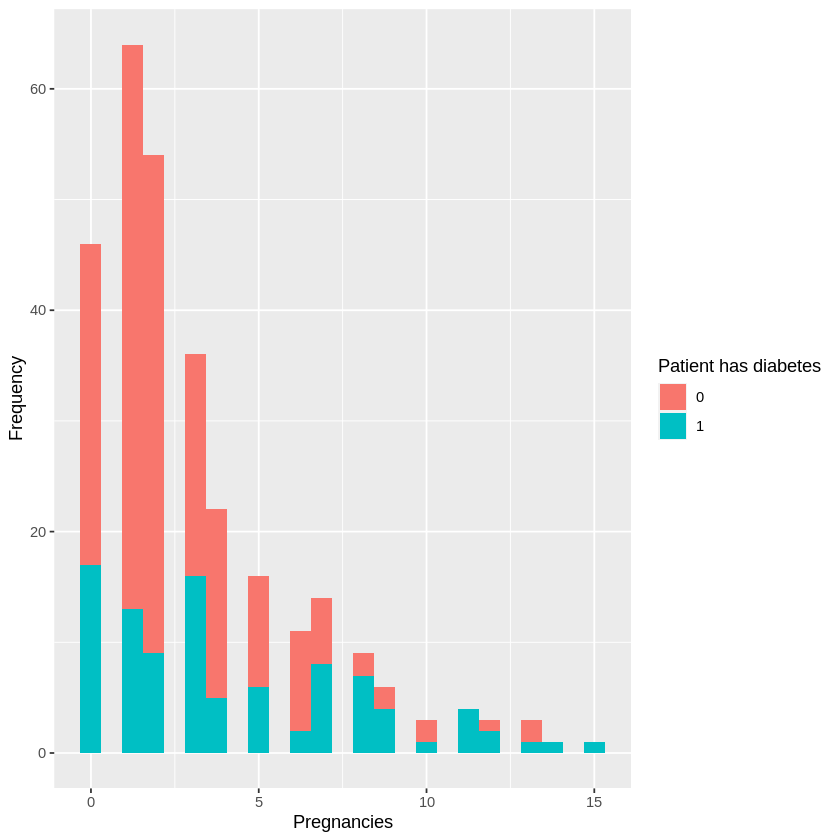

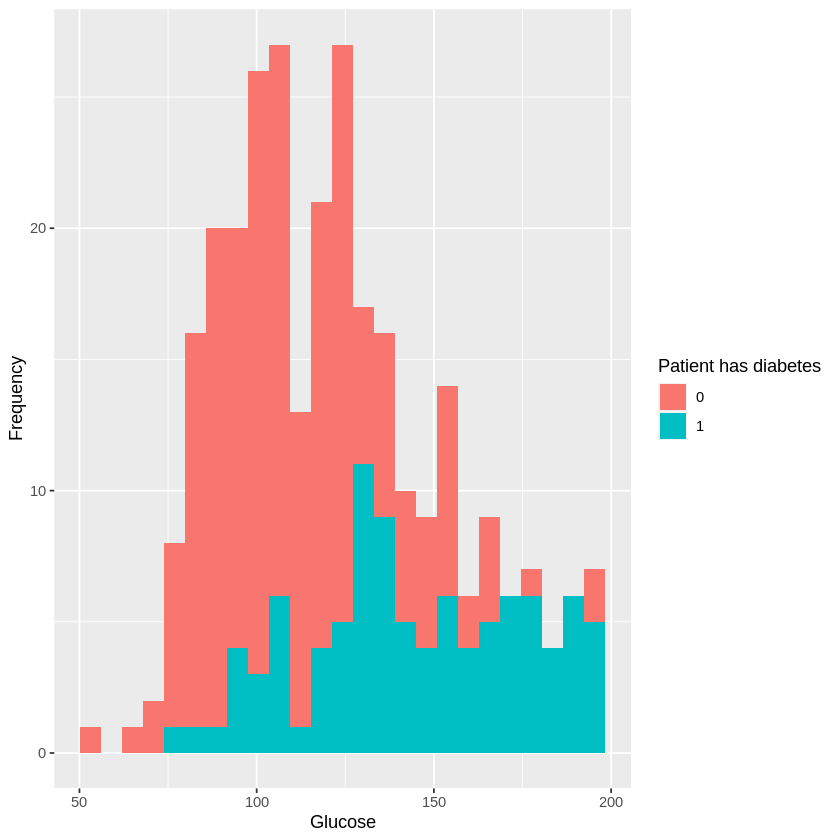

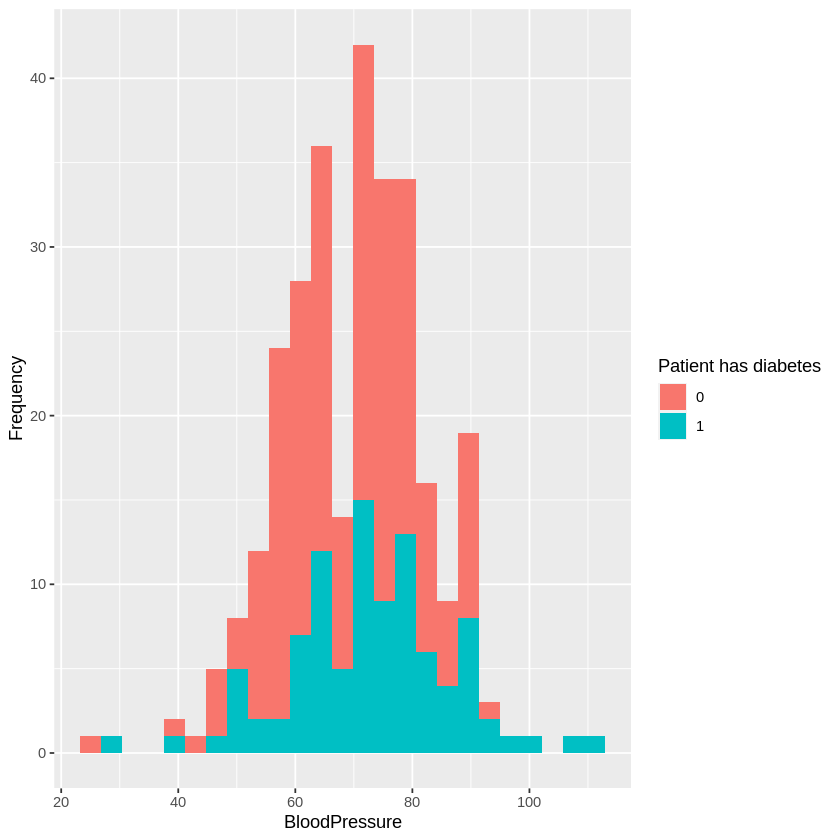

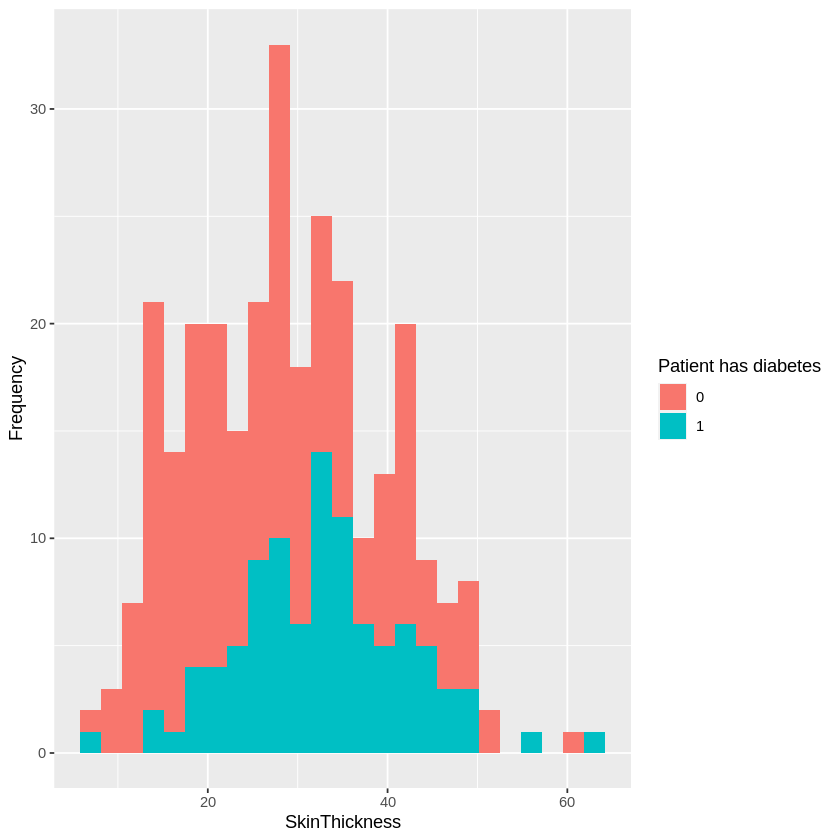

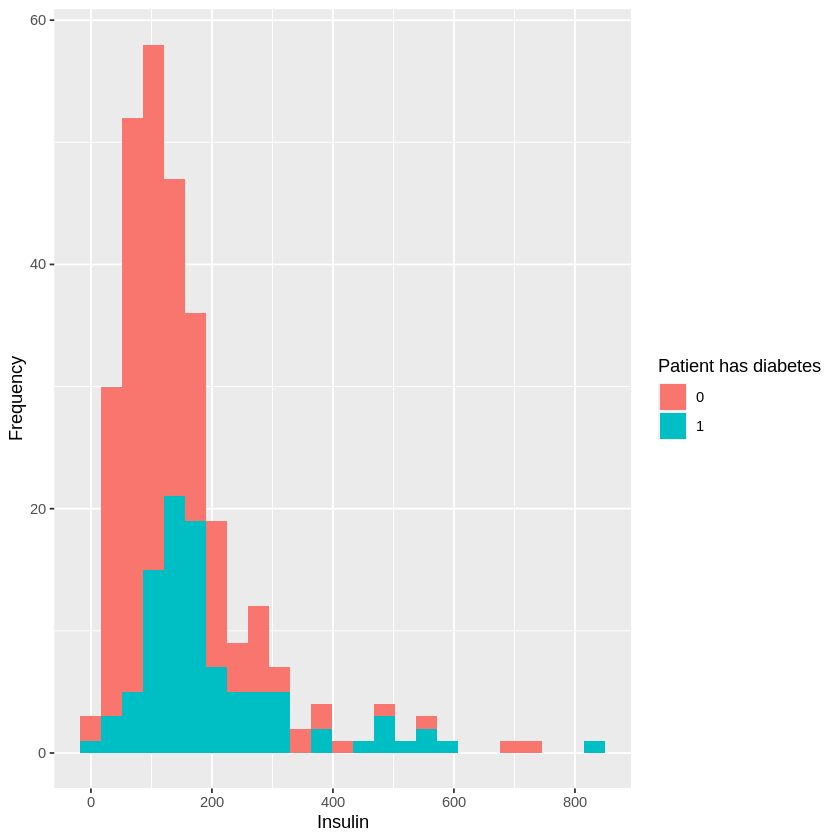

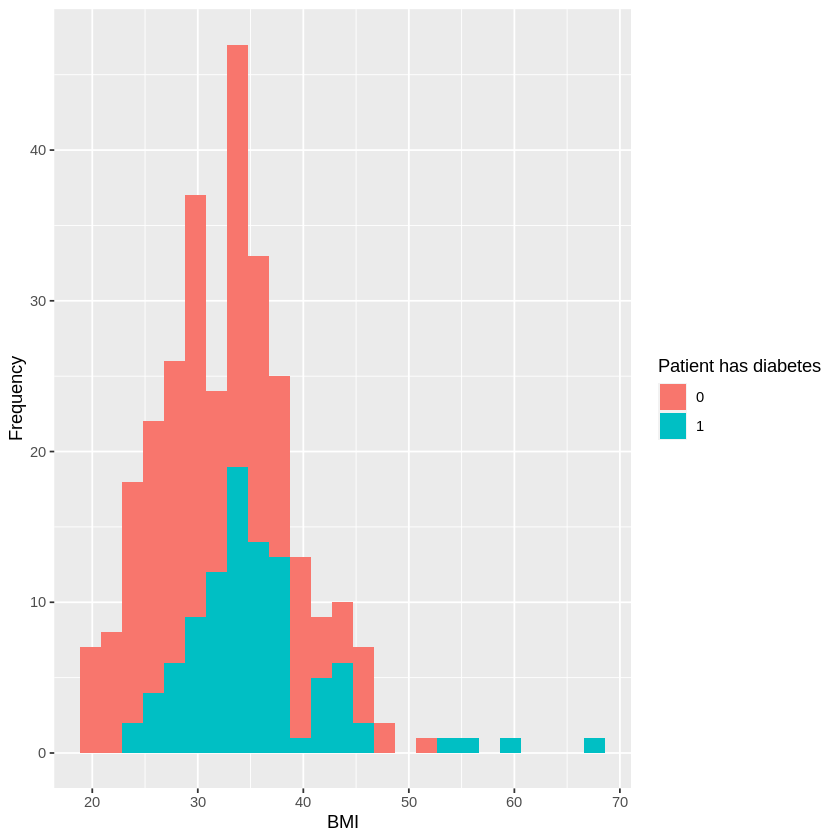

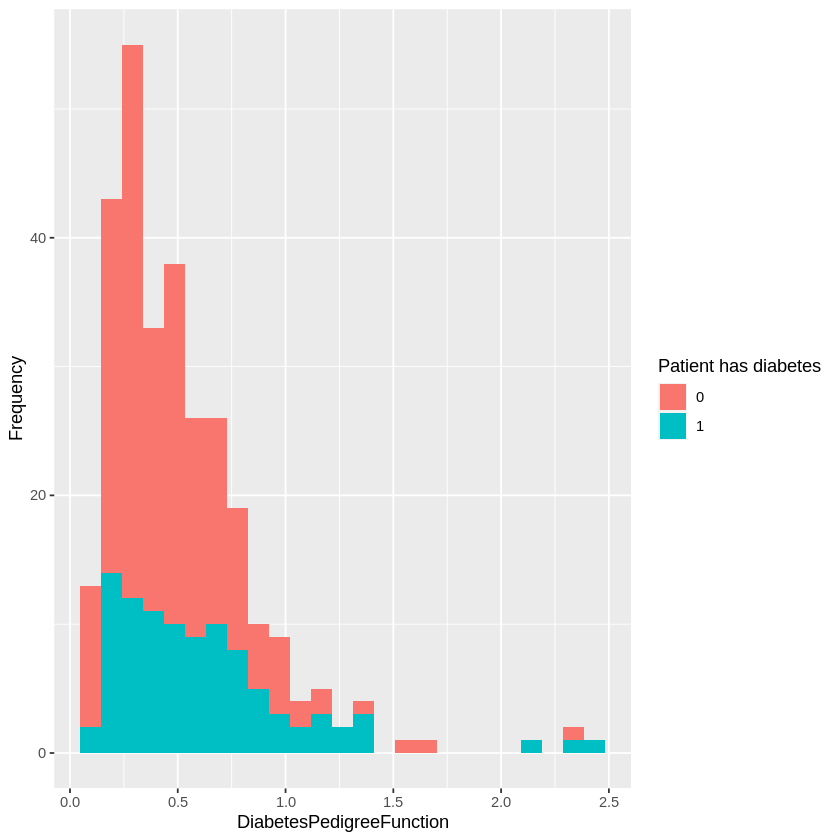

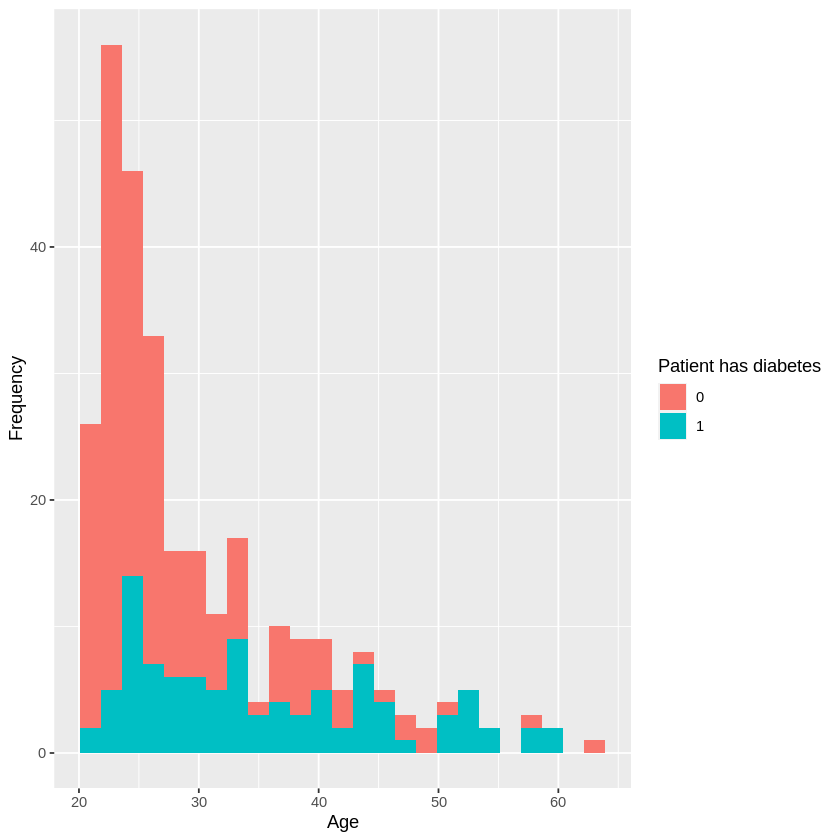

In [78]:
diabetes_training_reduced = select(diabetes_training, -Outcome)

visualization_function <- function(col_name) {
    plt <- ggplot(diabetes_training, aes_string(x=col_name, fill="Outcome")) + 
    geom_histogram(position="stack", bins=25) + 
    labs(x=col_name, y="Frequency", fill="Patient has diabetes")
    print(plt)
}


for (name in colnames(diabetes_training_reduced)) {
    visualization_function(name)
}


As we can see from the charts above, there does not seem to be any immediate relationship between just 1 variable and the likeliness of the patient having diabetes. However, this does not help us determine the relationship between many different variables, as higher dimensional relationships are difficult to visualize. We will see if any clusters form after running KNN. 